In [1]:
import os
os.chdir("/home/gauravk/Documents/DataScience/Datasets/K_russian/")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [7]:
# %timeit train_df = pd.read_csv("train.csv", parse_dates=[1])
# train_df.shape

In [8]:
# pd.to_datetime(train_df.timestamp)

In [9]:
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [5]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

train_df = pd.read_csv("train.csv", parse_dates=['timestamp'], date_parser=dateparse)

In [6]:
train_df.timestamp

0       2011-08-20
1       2011-08-23
2       2011-08-27
3       2011-09-01
4       2011-09-05
5       2011-09-06
6       2011-09-08
7       2011-09-09
8       2011-09-10
9       2011-09-13
10      2011-09-16
11      2011-09-16
12      2011-09-17
13      2011-09-19
14      2011-09-19
15      2011-09-20
16      2011-09-20
17      2011-09-20
18      2011-09-22
19      2011-09-22
20      2011-09-22
21      2011-09-22
22      2011-09-23
23      2011-09-23
24      2011-09-23
25      2011-09-24
26      2011-09-26
27      2011-09-26
28      2011-09-26
29      2011-09-27
           ...    
30441   2015-06-27
30442   2015-06-27
30443   2015-06-27
30444   2015-06-27
30445   2015-06-27
30446   2015-06-27
30447   2015-06-27
30448   2015-06-27
30449   2015-06-27
30450   2015-06-29
30451   2015-06-29
30452   2015-06-29
30453   2015-06-29
30454   2015-06-29
30455   2015-06-29
30456   2015-06-29
30457   2015-06-29
30458   2015-06-29
30459   2015-06-29
30460   2015-06-29
30461   2015-06-30
30462   2015

In [8]:
macro = pd.read_csv("macro.csv")
macro.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [9]:
dataDict = pd.read_table("data_dictionary.txt")

In [10]:
dataDict

,# train.csv and test.csv
0,price_doc: sale price (this is the target vari...
1,id: transaction id
2,timestamp: date of transaction
3,"full_sq: total area in square meters, includin..."
4,"life_sq: living area in square meters, excludi..."
5,"floor: for apartments, floor of the building"
6,max_floor: number of floors in the building
7,material: wall material
8,build_year: year built
9,num_room: number of living rooms


In [15]:
help (plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot - Provides a MATLAB-like plotting framework.

DESCRIPTION
    :mod:`~matplotlib.pylab` combines pyplot with numpy into a single namespace.
    This is convenient for interactive work, but for programming it
    is recommended that the namespaces be kept separate, e.g.::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1);
        y = np.sin(x)
        plt.plot(x, y)

FUNCTIONS
    acorr(x, hold=None, data=None, **kwargs)
        Plot the autocorrelation of `x`.
        
        Parameters
        ----------
        
        x : sequence of scalar
        
        hold : boolean, optional, *deprecated*, default: True
        
        detrend : callable, optional, default: `mlab.detrend_none`
            x is detrended by the `detrend` callable. Default is no
            normalization.
        
        normed : boolean, optional, default: True
            

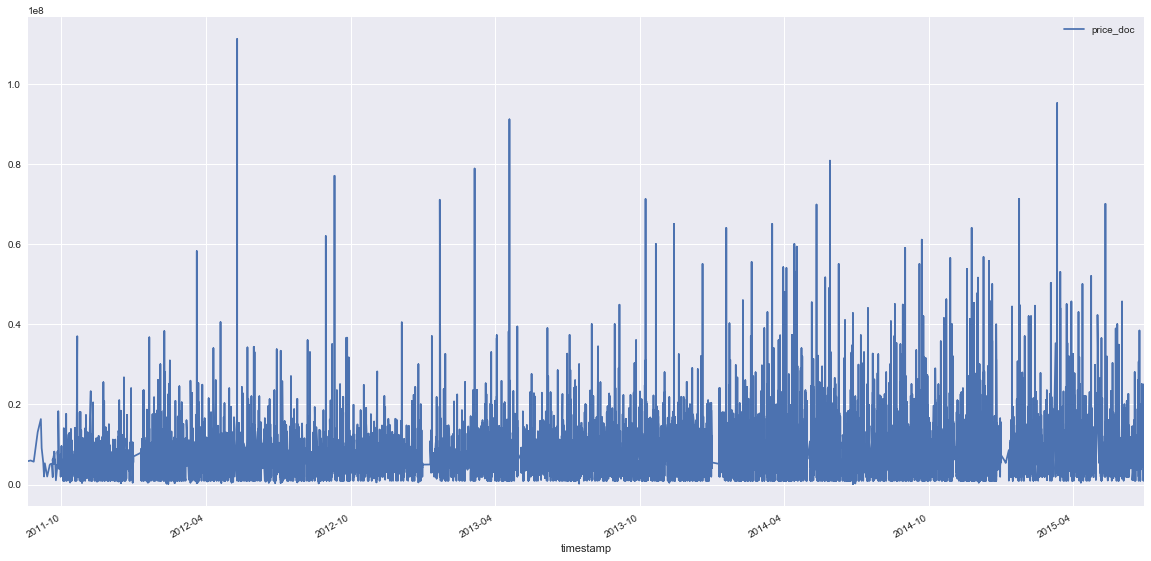

In [44]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
# plt.figure(figsize=(20,20))
train_df.plot(x='timestamp', y='price_doc')
plt.show()

In [39]:
pd.to_datetime(train_df.timestamp)

0       2011-08-20
1       2011-08-23
2       2011-08-27
3       2011-09-01
4       2011-09-05
5       2011-09-06
6       2011-09-08
7       2011-09-09
8       2011-09-10
9       2011-09-13
10      2011-09-16
11      2011-09-16
12      2011-09-17
13      2011-09-19
14      2011-09-19
15      2011-09-20
16      2011-09-20
17      2011-09-20
18      2011-09-22
19      2011-09-22
20      2011-09-22
21      2011-09-22
22      2011-09-23
23      2011-09-23
24      2011-09-23
25      2011-09-24
26      2011-09-26
27      2011-09-26
28      2011-09-26
29      2011-09-27
           ...    
30441   2015-06-27
30442   2015-06-27
30443   2015-06-27
30444   2015-06-27
30445   2015-06-27
30446   2015-06-27
30447   2015-06-27
30448   2015-06-27
30449   2015-06-27
30450   2015-06-29
30451   2015-06-29
30452   2015-06-29
30453   2015-06-29
30454   2015-06-29
30455   2015-06-29
30456   2015-06-29
30457   2015-06-29
30458   2015-06-29
30459   2015-06-29
30460   2015-06-29
30461   2015-06-30
30462   2015